In [9]:
try:
  from google.colab import drive
  drive.mount('/content/drive/')
  shared_drive_foldername = 'NUTRECON'
  root = '/content/drive/Shareddrives/{}/'.format(shared_drive_foldername)
  !pip install pandas==1.4.2
  print('Running Code in Colab')
# ...or locally
except:
  # define the local directory of the project
#   root = 'D:/FV/Projects/NUTRECON/nutreconDrive/'
  root = '/mnt/data1/francisco/Projects/NUTRECON/nutreconDrive/'
  print('Running Code locally')

import numpy as np
import pandas as pd
import sys
sys.path.append(root + 'python')
import nutrecon_simulation as sim
from variableCoding import Vars
_v_ = Vars()

import plotly.express as px

beahviour_cols = sim.optimize_cols[:-4]

def get_probLottery(group):
  prob_lotteryChoice = len(group[group['choice'] == 1]) / uniqueLott_Nreps
  return prob_lotteryChoice

Running Code locally


# Testing Functions & routines

## Task parameters

In [3]:
uniqueLott_Nreps= 6      # Unique Lottery Repititions  

# # ---------------------------- Levy & Glimcher ------------------------------

# # Same-type & mixed type Trials Lottery probabilities
# st_refPs = [1]                                  # Reference option
# st_lottPs = [0.13, 0.22, 0.38, .50, .75]        # Lottery option

# # Same-type task variables
# st_money_refQs = [2]                            # Dolars
# st_money_lottQs = [2, 4.5, 10, 22.5, 50]        # Dolars

# st_cPlus_refQs = [5]                            # candies
# st_cPlus_lottQs = [5, 10, 20, 40, 80]           # candies
# # st_cPlus_refQs = [2]                          # crackers
# # st_cPlus_lottQs = [2, 5, 10, 20, 40]          # crackers

# st_cMinus_refQs = [60]                          # mL water
# st_cMinus_lottQs = [60, 125, 250, 500, 1000]    # mL water

# # Mixed-type task variables
# mt_refQs = [.2]                                 # Dolars
# mt_refPs = [1]
# mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

# mt_cPlus_lottQs = [10, 20, 30, 50,  80]         # candies
# # mt_cPlus_lottQs = [5, 10, 15, 25,  40]        # candies
# mt_cMinus_lottQs = [125, 250, 400, 600,  1000]  # water 

# -------------------------------- NUTRECON ---------------------------------

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [1]                               # Euros
st_money_lottQs = [1, 2, 5, 12, 20]                # Euros

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs = [20, 40, 80, 120, 200]           # mL of CS+ yogurt

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

mt_cPlus_lottQs = [40, 80, 120, 150, 200]      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))

Trials per type:
same     450
mixed    300
Name: trial_type, dtype: int64


## Subject specific parameters

In [90]:
# Subject specific parameters
st_money_alpha = 0.7
st_cPlus_alpha = 0.5
st_cMinus_alpha = 0.4

st_money_beta = 2.5
st_cPlus_beta = st_money_beta
st_cMinus_beta = st_money_beta

mt_cPlus_beta = 10
mt_cMinus_beta = 10

cPlus_sFactor = .05
cMinus_sFactor = .05

subjectTrials_df = sim._pack_subjectParameters(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, st_money_beta, 
                                              st_cPlus_beta, st_cMinus_beta, mt_cPlus_beta, mt_cMinus_beta, 
                                              cPlus_sFactor, cMinus_sFactor, 
                                              allTrials_df)
subjectTrials_df


,trial_type,ref_type,ref_qt,ref_prob,lott_type,lott_qt,lott_prob,ref_alpha,lott_alpha,beta,sFactor
0,same,Money,1.0,1,Money,1,0.13,0.7,0.7,2.5,1.00
1,same,Money,1.0,1,Money,1,0.22,0.7,0.7,2.5,1.00
2,same,Money,1.0,1,Money,1,0.38,0.7,0.7,2.5,1.00
3,same,Money,1.0,1,Money,1,0.50,0.7,0.7,2.5,1.00
4,same,Money,1.0,1,Money,1,0.75,0.7,0.7,2.5,1.00
...,...,...,...,...,...,...,...,...,...,...,...
745,mixed,Money,0.2,1,CS-,200,0.13,0.7,0.4,10.0,0.05
746,mixed,Money,0.2,1,CS-,200,0.22,0.7,0.4,10.0,0.05
747,mixed,Money,0.2,1,CS-,200,0.38,0.7,0.4,10.0,0.05
748,mixed,Money,0.2,1,CS-,200,0.50,0.7,0.4,10.0,0.05


### Simulate choices

In [88]:
seed = 1
np.random.seed(seed)

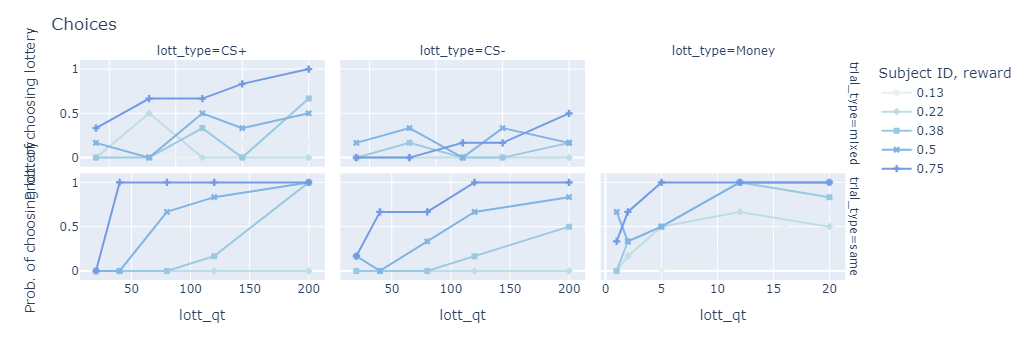

In [93]:
subjectTrials_df = sim._get_subject_choices(subjectTrials_df)



subject_choiceCount_df = pd.DataFrame(subjectTrials_df[beahviour_cols].groupby(
                    list(subjectTrials_df[beahviour_cols].columns[:-1])
                    ).apply(
                lambda df: get_probLottery(df)), 
                columns = [_v_.probLotteryChoice_colName]).reset_index()

title = 'Choices'

hover_cols = ['lott_type']
hover_data = {key:False for key in subject_choiceCount_df.columns}

fig = px.line(subject_choiceCount_df, facet_col = 'lott_type', facet_row = 'trial_type',
            x=beahviour_cols[-3], y=_v_.probLotteryChoice_colName, 
            color='lott_prob',  markers=True,
            symbol = 'lott_prob', 
            color_discrete_sequence = px.colors.sequential.dense,
            hover_data = hover_data, 
            category_orders= {
                        'lottery p': sorted(list(subject_choiceCount_df[beahviour_cols[-2]].unique())),
                        }
                )
fig.update_layout(
    title = title,
    legend_title="Subject ID, reward",
)                                
fig.update_xaxes(matches=None)

fig.show()

In [92]:
subject_choiceCount_df

,trial_type,ref_type,ref_qt,ref_prob,lott_type,lott_qt,lott_prob,Prob. of choosing lottery
0,mixed,Money,0.2,1,CS+,40,0.13,0.000000
1,mixed,Money,0.2,1,CS+,40,0.22,0.000000
2,mixed,Money,0.2,1,CS+,40,0.38,0.166667
3,mixed,Money,0.2,1,CS+,40,0.50,0.166667
4,mixed,Money,0.2,1,CS+,40,0.75,0.000000
...,...,...,...,...,...,...,...,...
120,same,Money,1.0,1,Money,20,0.13,0.500000
121,same,Money,1.0,1,Money,20,0.22,0.833333
122,same,Money,1.0,1,Money,20,0.38,1.000000
123,same,Money,1.0,1,Money,20,0.50,1.000000


## Parameter Estimation

In [7]:
alphaMoney0 = st_money_alpha
alphaCplus0 = st_cPlus_alpha
alphaCminus0 = st_cMinus_alpha
st_betaMoney0 = st_money_beta # also used in model with only one beta
st_betaCplus0 = st_cPlus_beta
st_betaCminus0 = st_cMinus_beta
mt_betaCplus0 = mt_cPlus_beta
mt_betaCminus0 = mt_cMinus_beta
sFactorCplus0 = cPlus_sFactor
sFactorCminus0= cMinus_sFactor


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

### Likelihood calculation

In [8]:
# Checking if Likelihood calculation is working for simultaneous estimation and 6 parameters


df = subjectTrials_df.copy()

df['likelihood'] = df.apply(lambda row: sim._get_likelihood(row, x0_6params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']


if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')

Likelihood well calculated.


In [9]:
# Checking if Likelihood calculation is working for simultaneous estimation and 10 parameters


df = subjectTrials_df.copy()

df['likelihood'] = df.apply(lambda row: sim._get_likelihood(row, x0_10params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']


if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')


Likelihood well calculated.


In [10]:
# Checking if Likelihood calculation is working for stepwise estimation and 6 parameters
df = subjectTrials_df.copy()

(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
    beta,
    cPlus_sFactor, cMinus_sFactor) = x0_6params
st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            beta)
mt_params = (cPlus_sFactor, cMinus_sFactor)


st_mask = df[sim.column_names[0]] == 'same'
df.loc[st_mask,'likelihood'] = df.loc[st_mask,:].apply(lambda row: sim._get_st_likelihood(row, st_params), axis = 1)

mt_mask = df[sim.column_names[0]] == 'mixed'
cPlus_mask = df[sim.column_names[4]] == 'CS+'
cMinus_mask = df[sim.column_names[4]] == 'CS-'

money_alpha_est = st_money_alpha
cPlus_alpha_est = st_cPlus_alpha
cMinus_alpha_est = st_cMinus_alpha
beta_est = st_money_beta

df.loc[mt_mask, sim.optimize_cols[8]] = money_alpha_est
df.loc[cPlus_mask, sim.optimize_cols[9]] = st_cPlus_alpha
df.loc[cMinus_mask, sim.optimize_cols[9]] = cMinus_alpha_est
df.loc[mt_mask, sim.optimize_cols[10]] = beta_est

df.loc[mt_mask,'likelihood'] = df.loc[mt_mask,:].apply(lambda row: sim._get_mt_likelihood(row, mt_params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']


if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')

Likelihood well calculated.


In [11]:
# Checking if Likelihood calculation is working for stepwise estimation and 10 parameters

df = subjectTrials_df.copy()

(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
    st_money_beta, st_cPlus_beta, st_cMinus_beta,
    mt_cPlus_beta, mt_cMinus_beta,
    cPlus_sFactor, cMinus_sFactor) = x0_10params
st_params = (st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
            st_money_beta, st_cPlus_beta, st_cMinus_beta)
mt_params = (mt_cPlus_beta, mt_cMinus_beta,
            cPlus_sFactor, cMinus_sFactor)

st_mask = df[sim.column_names[0]] == 'same'
df.loc[st_mask,'likelihood'] = df.loc[st_mask,:].apply(lambda row: sim._get_st_likelihood(row, st_params), axis = 1)

mt_mask = df[sim.column_names[0]] == 'mixed'
cPlus_mask = df[sim.column_names[4]] == 'CS+'
cMinus_mask = df[sim.column_names[4]] == 'CS-'

money_alpha_est = st_money_alpha
cPlus_alpha_est = st_cPlus_alpha
cMinus_alpha_est = st_cMinus_alpha

df.loc[mt_mask, sim.optimize_cols[8]] = money_alpha_est
df.loc[cPlus_mask, sim.optimize_cols[9]] = st_cPlus_alpha
df.loc[cMinus_mask, sim.optimize_cols[9]] = cMinus_alpha_est

df.loc[mt_mask,'likelihood'] = df.loc[mt_mask,:].apply(lambda row: sim._get_mt_likelihood(row, mt_params), axis = 1)

tmp_df = df[['pL','choice', 'likelihood']].copy()

mask_0 = tmp_df['choice'] == 0
mask_1 = tmp_df['choice'] == 1

tmp_df.loc[mask_0,'check'] = 1 - tmp_df.loc[mask_0,'pL'] - tmp_df.loc[mask_0,'likelihood']
tmp_df.loc[mask_1,'check'] = tmp_df.loc[mask_1,'pL'] - tmp_df.loc[mask_1,'likelihood']

if tmp_df['check'].max() == 0:
    print('Likelihood well calculated.')
else:
    print('something\'s wrong')

Likelihood well calculated.


### Model Fit

In [12]:
# alphaMoney0 = st_money_alpha
# alphaCplus0 = st_cPlus_alpha
# alphaCminus0 = st_cMinus_alpha
# st_betaMoney0 = st_money_beta # also used in model with only one beta
# st_betaCplus0 = st_cPlus_beta
# st_betaCminus0 = st_cMinus_beta
# mt_betaCplus0 = mt_cPlus_beta
# mt_betaCminus0 = mt_cMinus_beta
# sFactorCplus0 = cPlus_sFactor
# sFactorCminus0= cMinus_sFactor

alphaMoney0 = 1
alphaCplus0 = 1
alphaCminus0 = 1
st_betaMoney0 = 1 # also used in model with only one beta
st_betaCplus0 = 1
st_betaCminus0 = 1
mt_betaCplus0 = 1
mt_betaCminus0 = 1
sFactorCplus0 = 1
sFactorCminus0= 1


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

In [13]:

args = (subjectTrials_df.copy())


res_st, res_mt, st_iterParams_df, mt_iterParams_df = sim.stepwise_estimate(args, x0_6params)



/mnt/data1/francisco/Projects/NUTRECON/nutreconDrive/python/nutrecon_simulation.py:280: RuntimeWarning:

divide by zero encountered in log

/mnt/data1/francisco/Projects/NUTRECON/nutreconDrive/python/nutrecon_simulation.py:280: RuntimeWarning:

divide by zero encountered in log

/mnt/data1/francisco/Apps/anaconda3/envs/nutrecon/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

/mnt/data1/francisco/Projects/NUTRECON/nutreconDrive/python/nutrecon_simulation.py:280: RuntimeWarning:

divide by zero encountered in log

/mnt/data1/francisco/Apps/anaconda3/envs/nutrecon/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

/mnt/data1/francisco/Projects/NUTRECON/nutreconDrive/python/nutrecon_simulation.py:280: RuntimeWarning:

divide by zero encountered in log

/mnt/data1/francisco/Apps/anaconda3/envs/nutrecon/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:

In [14]:
st_iterParams_df

,Money alpha,CS+ alpha,CS- alpha,beta


In [15]:
np.tan(0.461)

0.4966948563901386

In [16]:
sim.print_stepwiseModel_output(res_st, res_mt)

Same type trials
  NaN result encountered.
    - parameters: [1. 1. 1. 1.]
  - std. error: [1. 1. 1. 1.]

Confidene intervals:
  - parameter 1: 1.0 ± 1.96
  - parameter 2: 1.0 ± 1.96
  - parameter 3: 1.0 ± 1.96
  - parameter 4: 1.0 ± 1.96

Mixed type trials
  Optimization terminated successfully.
    - parameters: [0.24516328 0.1014488 ]
  - std. error: [0.05683278 0.01637989]

  Confidene intervals:
    - parameter 1: 0.245 ± 0.111
    - parameter 2: 0.101 ± 0.032


In [17]:
args = (subjectTrials_df.copy())
res_st, res_mt = sim.stepwise_estimate(args, x0_10params)

/mnt/data1/francisco/Projects/NUTRECON/nutreconDrive/python/nutrecon_simulation.py:280: RuntimeWarning:

divide by zero encountered in log

/mnt/data1/francisco/Projects/NUTRECON/nutreconDrive/python/nutrecon_simulation.py:280: RuntimeWarning:

divide by zero encountered in log

/mnt/data1/francisco/Apps/anaconda3/envs/nutrecon/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

/mnt/data1/francisco/Projects/NUTRECON/nutreconDrive/python/nutrecon_simulation.py:280: RuntimeWarning:

divide by zero encountered in log

/mnt/data1/francisco/Apps/anaconda3/envs/nutrecon/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

/mnt/data1/francisco/Projects/NUTRECON/nutreconDrive/python/nutrecon_simulation.py:280: RuntimeWarning:

divide by zero encountered in log

/mnt/data1/francisco/Apps/anaconda3/envs/nutrecon/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:

ValueError: too many values to unpack (expected 2)

In [51]:
sim.print_stepwiseModel_output(res_st, res_mt)

Same type trials
  NaN result encountered.
    - parameters: [1. 1. 1. 1. 1. 1.]
  - std. error: [1. 1. 1. 1. 1. 1.]

Confidene intervals:
  - parameter 1: 1.0 ± 1.96
  - parameter 2: 1.0 ± 1.96
  - parameter 3: 1.0 ± 1.96
  - parameter 4: 1.0 ± 1.96
  - parameter 5: 1.0 ± 1.96
  - parameter 6: 1.0 ± 1.96

Mixed type trials
  Desired error not necessarily achieved due to precision loss.
    - parameters: [7.59643839e-04 7.68670849e-04 3.00706064e+02 1.20265725e+02]
  - std. error: [1.16953471e-04 7.84973491e-05 2.87136786e-01 1.22870916e-01]

  Confidene intervals:
    - parameter 1: 0.001 ± 0.0
    - parameter 2: 0.001 ± 0.0
    - parameter 3: 300.706 ± 0.563
    - parameter 4: 120.266 ± 0.241


In [52]:
res = sim.simultaneous_estimate(args, x0_6params)

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:271: RuntimeWarning:

divide by zero encountered in log

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:271: RuntimeWarning:

divide by zero encountered in log

c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:271: RuntimeWarning:

divide by zero encountered in log

c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:271: RuntimeWarning:

divide by zero encountered in log

c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning:

invalid value encountered in subtract

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.

In [53]:
sim.print_simultaneousModel_output(res)

NaN result encountered.
  - parameters: [1. 1. 1. 1. 1. 1.]
  - std. error: [1. 1. 1. 1. 1. 1.]

Confidene intervals:
  - parameter 1: 1.0 ± 1.96
  - parameter 2: 1.0 ± 1.96
  - parameter 3: 1.0 ± 1.96
  - parameter 4: 1.0 ± 1.96
  - parameter 5: 1.0 ± 1.96
  - parameter 6: 1.0 ± 1.96


In [ ]:
res = sim.simultaneous_estimate(args, x0_10params)

D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:362: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.log(likelihood))
D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:362: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.log(likelihood))
c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:362: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.log(likelihood))
c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
D:\FV/Projects/NUTRECON/nutreconDrive/python\nutrecon_simulation.py:362: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.l

In [ ]:
sim.print_simultaneousModel_output(res)

Desired error not necessarily achieved due to precision loss.
  - parameters: [6.60772605e-01 8.44967993e-01 8.44119897e-01 1.85517988e+00
 3.71777455e+02 7.70333071e+01 2.66148130e-03 3.02040032e+00
 8.59764771e+01 1.39460227e-01]
  - std. error: [4.53192475e-02 1.08150826e-04 6.42717444e-04 3.31328430e-01
 7.61466405e+00 9.06893221e-01 4.56256523e-04 8.88762040e-01
 2.57293124e+00 3.31200268e-02]

Confidene intervals:
  - parameter 1: 0.661 ± 0.089
  - parameter 2: 0.845 ± 0.0
  - parameter 3: 0.844 ± 0.001
  - parameter 4: 1.855 ± 0.649
  - parameter 5: 371.777 ± 14.925
  - parameter 6: 77.033 ± 1.778
  - parameter 7: 0.003 ± 0.001
  - parameter 8: 3.02 ± 1.742
  - parameter 9: 85.976 ± 5.043
  - parameter 10: 0.139 ± 0.065


# Simulation

## Task Parameters

In [10]:
uniqueLott_Nreps= 6      # Unique Lottery Repititions  

# Same-type & mixed type Trials Lottery probabilities
st_refPs = [1]                              # Reference option
st_lottPs = [0.13, 0.22, 0.38, .50, .75]    # Lottery option

# Same-type task variables
st_money_refQs = [1]                               # Euros
st_money_lottQs = [1, 2, 5, 12, 20]                # Euros

st_cPlus_refQs = [20]                              # mL of CS+ yogurt 
st_cPlus_lottQs = [20, 40, 80, 120, 200]           # mL of CS+ yogurt

st_cMinus_refQs = st_cPlus_refQs                      # mL of CS- yogurt 
st_cMinus_lottQs = st_cPlus_lottQs                    # mL of CS- yogurt 

# Mixed-type task variables
mt_refQs = [.2]                                # Euros
mt_refPs = [1]
mt_lottPs = [0.13, 0.22, 0.38, .50, .75]

mt_cPlus_lottQs = [40, 80, 120, 150, 200]      # mL of CS+ yogurt 
mt_cMinus_lottQs = mt_cPlus_lottQs            # mL of CS- yogurt 


allTrials_df = sim.pack_taskParameters(
                st_refPs, st_lottPs, st_money_refQs, st_money_lottQs, st_cPlus_refQs, st_cPlus_lottQs,
                st_cMinus_refQs, st_cMinus_lottQs, mt_refQs, mt_refPs, mt_lottPs, mt_cPlus_lottQs,
                mt_cMinus_lottQs, uniqueLott_Nreps)

print('Trials per type:\n{}'.format(allTrials_df['trial_type'].value_counts()))

Trials per type:
same     450
mixed    300
Name: trial_type, dtype: int64


## Initialization Parameters

In [11]:
alphaMoney0 = 1
alphaCplus0 = 1
alphaCminus0 = 1
st_betaMoney0 = 1 # also used in model with only one beta
st_betaCplus0 = 1
st_betaCminus0 = 1
mt_betaCplus0 = 1
mt_betaCminus0 = 1
sFactorCplus0 = 1
sFactorCminus0= 1


x0_10params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0, st_betaCplus0, st_betaCminus0, mt_betaCplus0, mt_betaCminus0,
      sFactorCplus0, sFactorCminus0)

x0_6params = (alphaMoney0, alphaCplus0, alphaCminus0, 
      st_betaMoney0,
      sFactorCplus0, sFactorCminus0)

## Generate parameters per participant

In [12]:
from tqdm import tqdm
from numpy import random

N_iter = 100
x0 = x0_6params

# mean parameters
mean_std_st_money_alpha = (0.7, 0.1, N_iter)
mean_std_st_cPlus_alpha = (0.8, 0.1, N_iter)
mean_std_st_cMinus_alpha = (0.8, 0.1, N_iter)
mean_std_st_money_beta = (1.8, 0.3, N_iter)
mean_std_st_cPlus_beta = mean_std_st_money_beta
mean_std_st_cMinus_beta = mean_std_st_money_beta
mean_std_mt_cPlus_beta = mean_std_st_money_beta
mean_std_mt_cMinus_beta = mean_std_st_money_beta
mean_std_cPlus_sFactor = (.2, 0.05, N_iter)
mean_std_cMinus_sFactor = (.2, 0.05, N_iter)

st_money_alpha_arr = abs(random.normal(*mean_std_st_money_alpha))
st_cPlus_alpha_arr = abs(random.normal(*mean_std_st_cPlus_alpha))
st_cMinus_alpha_arr = abs(random.normal(*mean_std_st_cMinus_alpha))
st_money_beta_arr = abs(random.normal(*mean_std_st_money_beta))
if x0 == x0_6params:
    st_param_size = 4
    mt_param_size = 2
    st_cPlus_beta_arr = st_money_beta_arr
    st_cMinus_beta_arr = st_money_beta_arr
    mt_cPlus_beta_arr = st_money_beta_arr
    mt_cMinus_beta_arr = st_money_beta_arr
else:    
    st_param_size = 6
    mt_param_size = 4
    st_cPlus_beta_arr = abs(random.normal(*mean_std_st_cPlus_beta))
    st_cMinus_beta_arr = abs(random.normal(*mean_std_st_cMinus_beta))
    mt_cPlus_beta_arr = abs(random.normal(*mean_std_mt_cPlus_beta))
    mt_cMinus_beta_arr = abs(random.normal(*mean_std_mt_cMinus_beta))
    
cPlus_sFactor_arr = abs(random.normal(*mean_std_cPlus_sFactor))
cMinus_sFactor_arr = abs(random.normal(*mean_std_cMinus_sFactor))

st_pars = np.stack([st_money_alpha_arr, st_cPlus_alpha_arr, st_cMinus_alpha_arr,
                    st_money_beta_arr, st_cPlus_beta_arr, st_cMinus_beta_arr,
                    ] )

mt_pars = np.stack([mt_cPlus_beta_arr, mt_cMinus_beta_arr,
                    cPlus_sFactor_arr, cMinus_sFactor_arr])

st_flags = []
mt_flags = []


st_estPars = np.zeros((st_param_size, N_iter))
mt_estPars = np.zeros((mt_param_size, N_iter))
st_hessians = np.zeros((st_param_size, st_param_size, N_iter))
mt_hessians = np.zeros((mt_param_size, mt_param_size, N_iter))

import warnings
warnings.filterwarnings("ignore")

for i in tqdm(range(N_iter)):
    # Get parameters per participant
    st_money_alpha = st_money_alpha_arr[i]
    st_cPlus_alpha = st_cPlus_alpha_arr[i]
    st_cMinus_alpha = st_cMinus_alpha_arr[i]
    st_money_beta = st_money_beta_arr[i]
    st_cPlus_beta = st_cPlus_beta_arr[i]
    st_cMinus_beta = st_cMinus_beta_arr[i]
    mt_cPlus_beta = mt_cPlus_beta_arr[i]
    mt_cMinus_beta = mt_cMinus_beta_arr[i]
    cPlus_sFactor = cPlus_sFactor_arr[i]
    cMinus_sFactor = cMinus_sFactor_arr[i]

    subjectTrials_df = sim.pack_subjectParameters(st_money_alpha, st_cPlus_alpha, st_cMinus_alpha, 
                                                  st_money_beta, st_cPlus_beta, st_cMinus_beta, 
                                                  mt_cPlus_beta, mt_cMinus_beta, 
                                                  cPlus_sFactor, cMinus_sFactor, 
                                                  allTrials_df)
    
    _subject_choiceCount_df = pd.DataFrame(subjectTrials_df[beahviour_cols].groupby(
                    list(subjectTrials_df[beahviour_cols].columns[:-1])
                    ).apply(
                lambda df: get_probLottery(df)), 
                columns = [_v_.probLotteryChoice_colName]).reset_index()
    _subject_choiceCount_df['iter'] = i
    
    res_st, res_mt, _st_iterParams_df, _mt_iterParams_df = sim.stepwise_estimate(subjectTrials_df, x0)

    _st_iterParams_df = _st_iterParams_df.reset_index().rename(columns={'index':'estim. iter'},)
    _st_iterParams_df['iter'] = i
    
    _mt_iterParams_df = _mt_iterParams_df.reset_index().rename(columns={'index':'estim. iter'},)
    _mt_iterParams_df['iter'] = i

    if i == 0:
        st_iterParams_df = _st_iterParams_df
        mt_iterParams_df = _mt_iterParams_df
        subject_choiceCount_df = _subject_choiceCount_df
    else:
        st_iterParams_df = pd.concat([st_iterParams_df, _st_iterParams_df], axis = 0)
        mt_iterParams_df = pd.concat([mt_iterParams_df, _mt_iterParams_df], axis = 0)
        subject_choiceCount_df = pd.concat([subject_choiceCount_df, _subject_choiceCount_df], axis = 0)
    
    st_flags.append(res_st.success)
    mt_flags.append(res_mt.success)

    st_estPars[:, i] = res_st.x
    st_hessians[:, :, i] = res_st.hess_inv
    mt_estPars[:, i] = res_mt.x
    mt_hessians[:, :, i] = res_mt.hess_inv





100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [03:30<00:00,  2.11s/it]


In [103]:
st_iterParams_df

,estim. iter,Money alpha,CS+ alpha,CS- alpha,beta,iter
0,0,0.927309,0.432894,0.178948,0.861868,0
1,1,0.703694,0.679566,0.003870,0.821080,0
2,2,0.697357,0.748248,-0.051216,0.834187,0
3,3,0.590699,0.738295,-0.079619,1.081887,0
4,4,0.625595,0.773997,-0.100873,1.136513,0
...,...,...,...,...,...,...
19,19,0.725398,0.726081,0.874738,2.544828,99
20,20,0.725271,0.726091,0.874717,2.545123,99
21,21,0.725222,0.726091,0.874709,2.545381,99
22,22,0.725222,0.726091,0.874709,2.545384,99


In [104]:
subject_choiceCount_df

,trial_type,ref_type,ref_qt,ref_prob,lott_type,lott_qt,lott_prob,Prob. of choosing lottery,iter
0,mixed,Money,0.2,1,CS+,40,0.13,0.666667,0
1,mixed,Money,0.2,1,CS+,40,0.22,0.833333,0
2,mixed,Money,0.2,1,CS+,40,0.38,1.000000,0
3,mixed,Money,0.2,1,CS+,40,0.50,1.000000,0
4,mixed,Money,0.2,1,CS+,40,0.75,1.000000,0
...,...,...,...,...,...,...,...,...,...
120,same,Money,1.0,1,Money,20,0.13,0.666667,99
121,same,Money,1.0,1,Money,20,0.22,0.833333,99
122,same,Money,1.0,1,Money,20,0.38,1.000000,99
123,same,Money,1.0,1,Money,20,0.50,1.000000,99


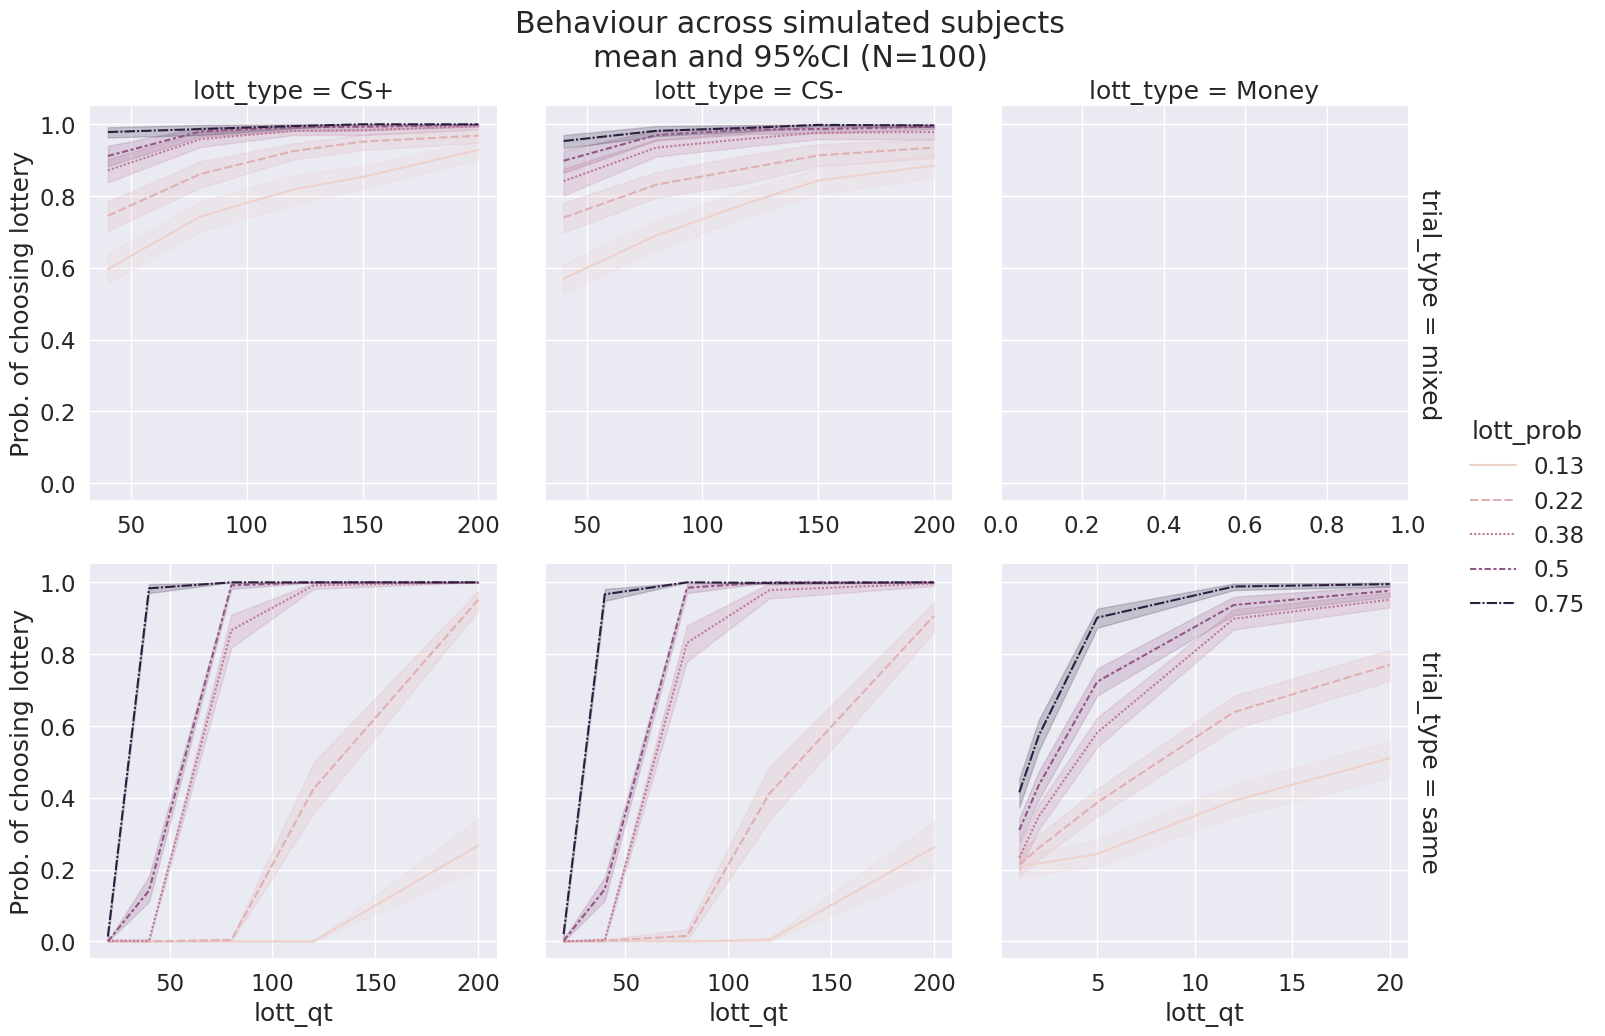

In [37]:
import seaborn as sns
sns.set(font_scale=1.5)
g = sns.relplot(
    data=subject_choiceCount_df.reset_index(drop=True), x=beahviour_cols[-3], y=_v_.probLotteryChoice_colName, 
    col="lott_type", row = 'trial_type',
    hue="lott_prob", style="lott_prob", kind="line",facet_kws={'sharex': False, 'margin_titles' : True},
)

g.fig.suptitle('Behaviour across simulated subjects\nmean and 95%CI (N={})'.format(N_iter), va='bottom');


In [23]:
st_params_colNames = ['Money alpha', 'CS+ alpha', 'CS- alpha', 
                      'Money beta', 'CS+ beta', 'CS- beta']

st_params_df = pd.DataFrame(st_pars).T
st_params_df.columns= st_params_colNames
st_params_df.index.name = 'iter'
st_params_df


,Money alpha,CS+ alpha,CS- alpha,Money beta,CS+ beta,CS- beta
iter,,,,,,
0,0.781716,0.787838,0.704691,1.562701,1.562701,1.562701
1,0.460460,0.883466,0.999047,2.162627,2.162627,2.162627
2,0.595719,0.836169,0.745499,1.441687,1.441687,1.441687
3,0.606876,0.720637,0.728622,1.691132,1.691132,1.691132
4,0.663962,0.942019,0.841050,0.890938,0.890938,0.890938
...,...,...,...,...,...,...
95,0.765800,0.787988,0.730666,1.809054,1.809054,1.809054
96,0.933736,0.924933,0.738962,1.701488,1.701488,1.701488
97,0.787809,0.908229,0.754540,1.551677,1.551677,1.551677


In [118]:
if x0 == x0_6params:
    st_estPars = np.concatenate( (st_estPars, np.tile(st_estPars[-1,:],(2,1))) )
st_estParams_df = pd.DataFrame(st_estPars).T
st_estParams_df.columns= st_params_colNames
st_estParams_df

,Money alpha,CS+ alpha,CS- alpha,Money beta,CS+ beta,CS- beta
0,0.602658,0.810571,0.708135,2.126377,2.126377,2.126377
1,0.749872,0.632529,0.752566,1.695647,1.695647,1.695647
2,0.559616,0.712340,0.802687,1.675297,1.675297,1.675297
3,0.722748,0.841777,0.744576,2.595263,2.595263,2.595263
4,0.635360,0.753838,0.693033,1.996747,1.996747,1.996747
...,...,...,...,...,...,...
95,0.821888,0.750011,0.875945,1.398365,1.398365,1.398365
96,0.876207,0.806804,0.631165,1.808639,1.808639,1.808639
97,0.695656,0.672059,0.876438,1.831777,1.831777,1.831777
98,0.892060,0.577620,0.888900,2.183217,2.183217,2.183217


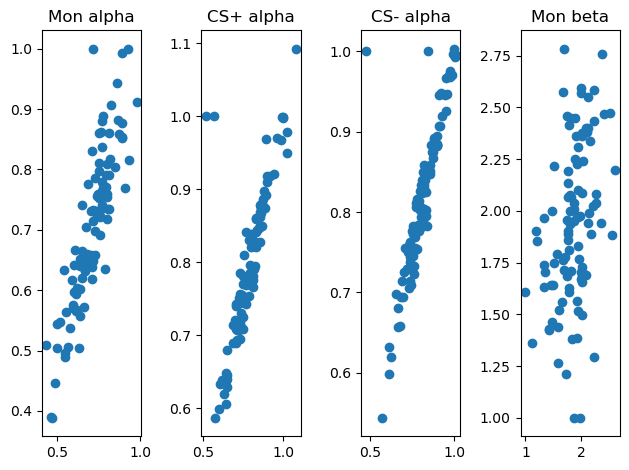

In [27]:
fig, ax = plt.subplots(ncols = st_param_size)
titles = ['Mon alpha', 'CS+ alpha', 'CS- alpha', 'Mon beta', 'CS+ beta', 'CS- beta']

for p in range(st_param_size):
    alphas = st_pars[p,:]
    est_alphas = st_estPars[p, :]
    ax[p].scatter(alphas, est_alphas)
    ax[p].set_title(titles[p])

plt.tight_layout()

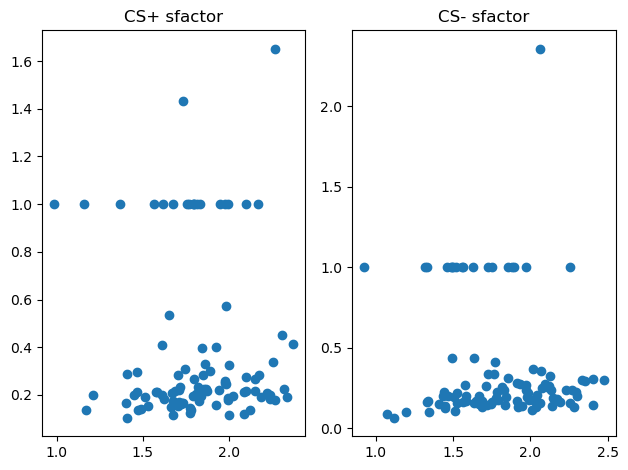

In [28]:
fig, ax = plt.subplots(ncols = 2)
titles = ['CS+ sfactor', 'CS- sfactor']

for p in range(2):
    alphas = mt_pars[p,:]
    est_alphas = mt_estPars[p,:]
    ax[p].scatter(alphas, est_alphas)
    ax[p].set_title(titles[p])

plt.tight_layout()

In [56]:
mt_estPars[flags,:]



TypeError: bad operand type for unary ~: 'list'